In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
with np.load('/content/drive/My Drive/DL data/NN PyTorch/prediction-challenge-01-data.npz') as fs:
    data_x = fs['data_x']
    data_y = fs['data_y']
    test_x = fs['test_x']

for i in [data_x, data_y, test_x]:
    print(i.shape)

(20000, 1, 28, 28)
(20000,)
(2000, 1, 28, 28)


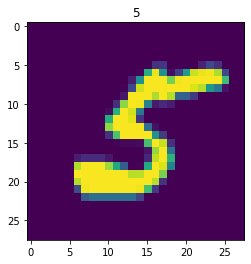

In [ ]:
plt.imshow(np.squeeze(data_x[15]))
plt.title(data_y[15])
plt.show()

In [ ]:
split = int(0.8 * len(data_x))      # 80/20 splitting
train_x = torch.Tensor(data_x[:split])    # torch.Tensor = convert numpy arrays to tensors
train_y = torch.Tensor(data_y[:split])
valid_x = torch.Tensor(data_x[split:])
valid_y = torch.Tensor(data_y[split:])

for i in [train_x, train_y, valid_x, valid_y]:
    print(i.shape)

torch.Size([16000, 1, 28, 28])
torch.Size([16000])
torch.Size([4000, 1, 28, 28])
torch.Size([4000])


In [ ]:
batch = 25

train = TensorDataset(train_x, train_y)
trainloader = DataLoader(train, batch_size=batch, shuffle=True)

val = TensorDataset(valid_x,valid_y)
valloader = DataLoader(val, batch_size=batch, shuffle=True)

In [ ]:
n_hidden = 512       # number of neurons in hidden layer

class FNN(nn.Module):
   def __init__(self, n_hidden):
        super().__init__()
        self.layer1 = nn.Linear(28*28, n_hidden)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(n_hidden, 10)

   def forward(self, inputs):
        inputs = self.layer1(inputs)        # cannot do nn.ReLU(self.layer1(inputs))
        inputs = self.relu(inputs)
        inputs = self.layer2(inputs)
        return inputs

net = FNN(n_hidden)

In [ ]:
optim = torch.optim.Adam(net.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
epochs = 10

for epoch in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        pred = net(inputs.view(-1, 28*28).float()) 
        loss = loss_fn(pred, labels.long())

        optim.zero_grad()
        loss.backward()
        optim.step()
    
    print(f"iteration: {epoch}\tcross entropy loss: {loss.item()}")

iteration: 0	cross entropy loss: 0.47165948152542114
iteration: 1	cross entropy loss: 0.49119317531585693
iteration: 2	cross entropy loss: 0.3736620843410492
iteration: 3	cross entropy loss: 0.4732755422592163
iteration: 4	cross entropy loss: 0.00879963394254446
iteration: 5	cross entropy loss: 0.3022238612174988
iteration: 6	cross entropy loss: 0.005687350407242775
iteration: 7	cross entropy loss: 0.13098065555095673
iteration: 8	cross entropy loss: 0.00031096956809051335
iteration: 9	cross entropy loss: 0.4092985987663269


In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs.view(-1, 28*28).float())       # here outputs.shape = (25, 10)
        _, predicted = torch.max(outputs, 1)     # https://pytorch.org/docs/stable/generated/torch.max.html
        total += labels.size(0)
        correct += (predicted == labels).sum().item()      # .item() = to convert the value from tensor to a normal integer

print('Accuracy on train data: %d %%' % ((correct / total) * 100))

Accuracy on train data: 96 %


In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for data in valloader:
        inputs, labels = data
        outputs = net(inputs.view(-1, 28*28).float())
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()       # .item() = to convert the value from tensor to a normal integer

print('Accuracy on val data: %d %%' % ((correct / total) * 100))

Accuracy on val data: 94 %


In [ ]:
_, prediction = net(torch.Tensor(test_x).view(-1, 28*28)).max(dim=-1)       #dim = -1 is the last dimension i.e., here it's the row

In [ ]:
prediction = prediction.detach().numpy()
assert prediction.ndim == 1
assert prediction.shape[0] == 2000

In [ ]:
np.save('prediction.npy', prediction)
from google.colab import files
files.download('prediction.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>